## ML Model Building -- RandomForest

In [12]:
import yaml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

In [3]:
try:
    with open('../config.yaml') as file:
        config = yaml.safe_load(file)
except:
    print("Yaml file not found.")

In [5]:
# Load merged datasets -- Judicial Autonomy index, macro and micro indicatord subsets & V-Dem dataset

q1_index_macro_micro_vdem = pd.read_csv(config['output_data']['q1_output_index_macro_micro_vdem'])
q1_index_macro_micro_vdem.head()

,country,year,country_year,index_measure,q1_macro_appointment_procedures_ind_measure,q1_micro_appointment_judges_ind_measure,q1_micro_appointment_court_presidents_ind_measure,q1_micro_appointment_veto_ind_measure,q1_macro_selection_criteria_ind_measure,q1_micro_selection_predetermined_law_ind_measure,...,q1_micro_disciplinary_proceedings_law_ind_measure,q1_micro_disciplinary_proceedings_actors_ind_measure,q1_micro_conflict_recusal_evaluation_ind_measure,q1_macro_judicial_administration_ind_measure,q1_micro_judicial_self_governance_bodies_ind_measure,q1_micro_judicial_self_governance_competences_ind_measure,q1_micro_courts_administration_ind_measure,reg_type,v2x_regime,v2x_polyarchy
0,Albania,2000,Albania_2000,0.52,0.55,0.33,0.33,1.0,0.5,0.67,...,0.62,0.67,0.67,0.5,0.5,0.0,1.0,0.0,1.0,0.407
1,Albania,2001,Albania_2001,0.52,0.55,0.33,0.33,1.0,0.5,0.67,...,0.62,0.67,0.67,0.5,0.5,0.0,1.0,0.0,1.0,0.440
2,Albania,2002,Albania_2002,0.52,0.55,0.33,0.33,1.0,0.5,0.67,...,0.62,0.67,0.67,0.5,0.5,0.0,1.0,0.0,1.0,0.484
3,Albania,2003,Albania_2003,0.52,0.55,0.33,0.33,1.0,0.5,0.67,...,0.62,0.67,0.67,0.5,0.5,0.0,1.0,0.0,1.0,0.490
4,Albania,2004,Albania_2004,0.55,0.55,0.33,0.33,1.0,0.5,0.67,...,0.62,0.67,1.00,0.5,0.5,0.0,1.0,0.0,1.0,0.490


### 1 Random Forest Classifier -- Predicting V-Dem Regimes of the World (4 Types)

#### 1.1 Train and Run Model -- Based on Judicial Autonomy Micro Indicators

In [6]:
# Select relevant columns for RandomForestClassifier
columns_micro_row_forest_class_model=['v2x_regime',
                                   'q1_micro_appointment_judges_ind_measure',
                                   'q1_micro_appointment_court_presidents_ind_measure',
                                   'q1_micro_appointment_veto_ind_measure',
                                   'q1_micro_selection_predetermined_law_ind_measure',
                                   'q1_micro_selection_intl_standards_ind_measure',
                                   'q1_micro_transparency_appeal_ind_measure',
                                   'q1_micro_judge_tenure_ind_measure',
                                   'q1_micro_judge_immunity_ind_measure',
                                   'q1_micro_judge_salary_ind_measure',
                                   'q1_micro_disciplinary_proceedings_law_ind_measure',
                                   'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                   'q1_micro_conflict_recusal_evaluation_ind_measure',
                                   'q1_micro_judicial_self_governance_bodies_ind_measure',
                                   'q1_micro_judicial_self_governance_competences_ind_measure',
                                   'q1_micro_courts_administration_ind_measure']

In [13]:
# Subset columns for RandomForestClassifier
forest_classifier_row_data_micro = q1_index_macro_micro_vdem[columns_micro_row_forest_class_model].copy()

# Rename regimes of the world
# 0: Closed Autocracy, 1: Electoral Autocracy, 2: Electoral Democracy, 3:Liberal Democracy
forest_classifier_row_data_micro['v2x_regime'] = forest_classifier_row_data_micro['v2x_regime'].replace({
    0:'closed_auto', 1:'elect_auto', 2: 'elect_dem', 3:'lib_dem'})

In [14]:
# Define target and features
target = forest_classifier_row_data_micro['v2x_regime']
features = forest_classifier_row_data_micro.drop(columns='v2x_regime')

In [15]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [16]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [18]:
# Train the model
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Predictions
y_pred_class = rf_classifier.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy:.2f}")

# Print detailed classification report
print(classification_report(y_test, y_pred_class))

Accuracy: 0.93
              precision    recall  f1-score   support

  elect_auto       0.78      0.93      0.85        27
   elect_dem       0.95      0.77      0.85        47
     lib_dem       0.96      1.00      0.98       110

    accuracy                           0.93       184
   macro avg       0.90      0.90      0.89       184
weighted avg       0.93      0.93      0.93       184



**Summary:**
- Strong performance: The accuracy of the KNN Classification Model to predict V-Dem Regimes of the World (target) from on the Judicial Autonomy micro indicators (features) is 93%, i.e. the model correctly predicts the regime type for 93% of the cases in the test set.
- Slight discrepancy in performance across classes suggests the need for further model refinement, especially to correctly identify cases of electoral democracy (elect_dem). 

#### 1.2 Visualize Outcome of RandomForestClassifier Model -- Based on Judicial Autonomy Micro Indicators

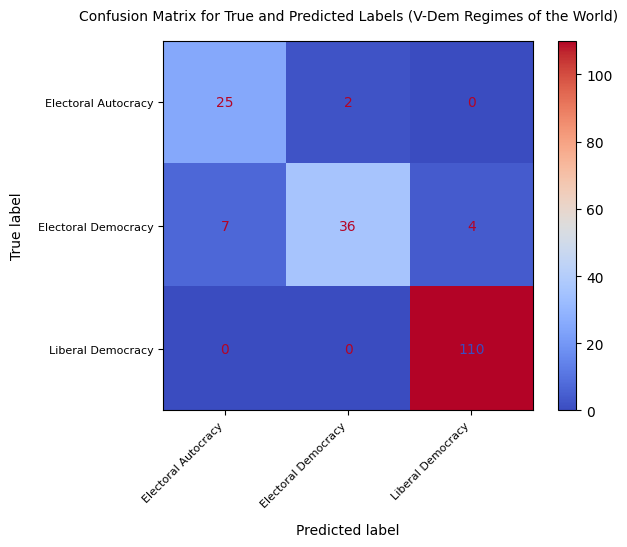

In [20]:
# Create Confusion Matrix for True and Predicted Labels (V-Dem Regimes of the World)

custom_labels = ['Electoral Autocracy', 'Electoral Democracy', 'Liberal Democracy']

cm = confusion_matrix(y_test, y_pred_class, labels=rf_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=custom_labels)
disp_plot = disp.plot(cmap='coolwarm')

plt.title('Confusion Matrix for True and Predicted Labels (V-Dem Regimes of the World)', fontsize=10, pad=15)

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

plt.xlabel('Predicted label', fontsize=10, labelpad=10)
plt.ylabel('True label', fontsize=10, labelpad=10)

plt.savefig("../figures/confusion_matrix_rf_classifier.jpeg", format="jpeg", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show();

#### 1.3 Identify Feature Importances of RandomForestClassifier Model

In [21]:
# Feature importance scores
feature_importances_class = rf_classifier.feature_importances_

In [22]:
# Create DataFrame with feature importances
features_df_class = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances_class})
features_df_class = features_df_class.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(features_df_class)

                                              Feature  Importance
0   q1_micro_judicial_self_governance_competences_...    0.135513
1                 q1_micro_judge_immunity_ind_measure    0.105737
2    q1_micro_conflict_recusal_evaluation_ind_measure    0.091087
3       q1_micro_selection_intl_standards_ind_measure    0.086211
4                   q1_micro_judge_tenure_ind_measure    0.085841
5   q1_micro_disciplinary_proceedings_actors_ind_m...    0.079750
6   q1_micro_judicial_self_governance_bodies_ind_m...    0.066138
7          q1_micro_courts_administration_ind_measure    0.065601
8            q1_micro_transparency_appeal_ind_measure    0.061027
9   q1_micro_disciplinary_proceedings_law_ind_measure    0.059845
10  q1_micro_appointment_court_presidents_ind_measure    0.052877
11              q1_micro_appointment_veto_ind_measure    0.045286
12            q1_micro_appointment_judges_ind_measure    0.041609
13                  q1_micro_judge_salary_ind_measure    0.013625
14   q1_mi

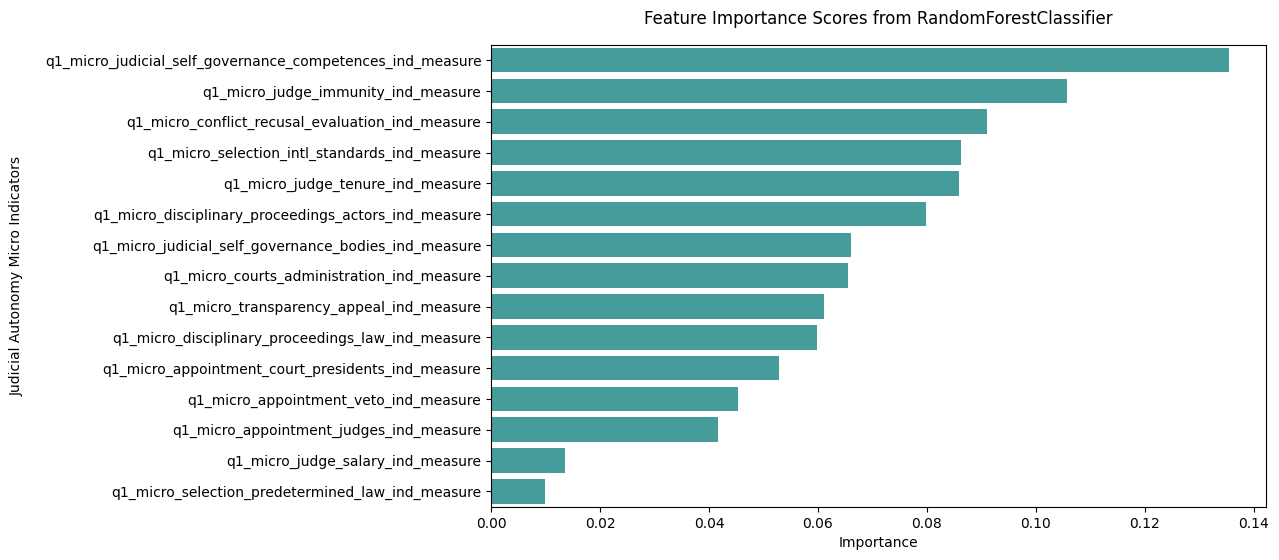

In [23]:
# Plot feature importances

plt.figure(figsize=(10, 6))
sns.barplot(data=features_df_class, x='Importance', y='Feature', color='#38aaa7')

plt.title('Feature Importance Scores from RandomForestClassifier', pad=15)
plt.xlabel('Importance')
plt.ylabel('Judicial Autonomy Micro Indicators', labelpad=15)

plt.savefig("../figures/importance_scores_rf_classifier.jpeg", format="jpeg", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show();

**Summary:**
- Most predictive features (Top 3)
  - Competences of judicial self-governance bodies
  - Judges' immunity
  - Conflict of interest, obligation of recusal, evaluation procedures

### 2 Random Forest Regression -- Predicting V-Dem Democracy Index

#### 2.1 Train and Run Model -- Based on Judicial Autonomy Micro Indicators

In [24]:
# Select relevant columns for RandomForestRegressor
columns_micro_row_forest_regr_model=['v2x_polyarchy',
                                     'q1_micro_appointment_judges_ind_measure',
                                     'q1_micro_appointment_court_presidents_ind_measure',
                                     'q1_micro_appointment_veto_ind_measure',
                                     'q1_micro_selection_predetermined_law_ind_measure',
                                     'q1_micro_selection_intl_standards_ind_measure',
                                     'q1_micro_transparency_appeal_ind_measure',
                                     'q1_micro_judge_tenure_ind_measure',
                                     'q1_micro_judge_immunity_ind_measure',
                                     'q1_micro_judge_salary_ind_measure',
                                     'q1_micro_disciplinary_proceedings_law_ind_measure',
                                     'q1_micro_disciplinary_proceedings_actors_ind_measure',
                                     'q1_micro_conflict_recusal_evaluation_ind_measure',
                                     'q1_micro_judicial_self_governance_bodies_ind_measure',
                                     'q1_micro_judicial_self_governance_competences_ind_measure',
                                     'q1_micro_courts_administration_ind_measure']

In [25]:
# Subset columns for KNN classification model
forest_regressor_dem_data_micro = q1_index_macro_micro_vdem[columns_micro_row_forest_regr_model].copy()

In [26]:
# Define target and features
target = forest_regressor_dem_data_micro['v2x_polyarchy']
features = forest_regressor_dem_data_micro.drop(columns='v2x_polyarchy')

In [27]:
# Save country-year information
country_info = q1_index_macro_micro_vdem['country']
year_info = q1_index_macro_micro_vdem['year']

In [28]:
# Train Test Split (incl. country-year information)
X_train, X_test, y_train, y_test, countries_train, countries_test, years_train, years_test = train_test_split(features, target, country_info, year_info, test_size=0.20, random_state=42)

In [29]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Initialize RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [31]:
# Train the model
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Predictions
y_pred_regr = rf_regressor.predict(X_test_scaled)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred_regr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_regr)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 0.00
Root Mean Squared Error: 0.04
R^2 Score: 0.96


**Summary:**
- Strong performance: The R2 score of the KNN Regression Model to predict the V-Dem Democracy Index scores (target) from the Judicial Autonomy micro indicators (features) is 96%.
- The high MSE and RMSE scores suggest a very high level of reliability.
- The nearly perfect model performance, however, also suggests potential overfitting which would have to be addressed in further model refinement. 

#### 2.2 Visualize Outcome of RandomForestRegressor Model -- Based on Judicial Autonomy Micro Indicators

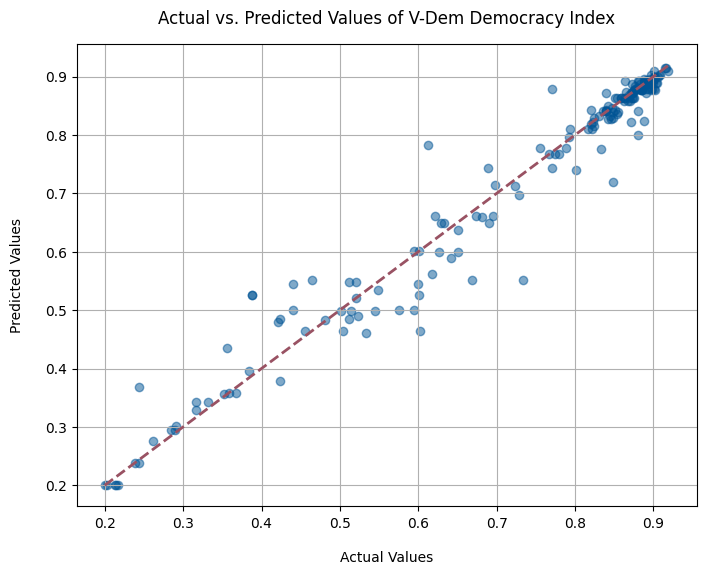

In [33]:
# Scatterplot for Actual vs. Predicted Values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_regr, alpha=0.5, color='#005495')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='#995263')  # Diagonal line for reference

plt.title('Actual vs. Predicted Values of V-Dem Democracy Index', fontsize=12, pad=15)
plt.xlabel('Actual Values', labelpad=15)
plt.ylabel('Predicted Values', labelpad=15)
plt.grid(True)
plt.show()

In [34]:
# Prepare DataFrame with actual values, predicted values, country and year
results_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred_regr,
    "country": q1_index_macro_micro_vdem.loc[y_test.index, "country"]})

# Calculate residuals
results_df["residual"] = results_df["y_test"] - results_df["y_pred"]

# Set threshold for considering a data point as an outlier (95th percentile of absolute residuals)
outlier_threshold = np.percentile(np.abs(results_df['residual']), 95)

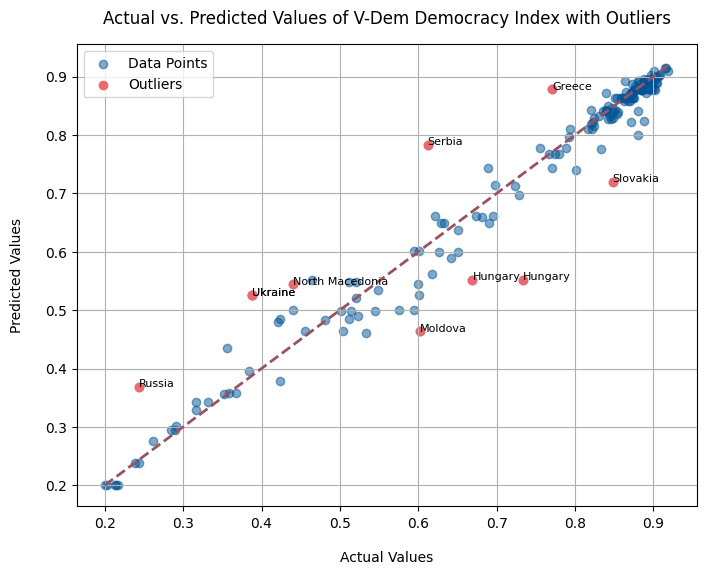

In [35]:
# Scatterplot with diagonal line and highlighting outliers

plt.figure(figsize=(8, 6))

plt.scatter(results_df['y_test'], results_df['y_pred'], alpha=0.5, color='#005495', label='Data Points')

# Highlight and annotate outliers
outliers = results_df[np.abs(results_df['residual']) > outlier_threshold]
plt.scatter(outliers['y_test'], outliers['y_pred'], color='#ed696d', label='Outliers')

for _, row in outliers.iterrows():
    plt.text(row['y_test'], row['y_pred'], row['country'], color='black', fontsize=8)

# Diagonal line for perfect predictions
plt.plot([results_df['y_test'].min(), results_df['y_test'].max()], 
         [results_df['y_test'].min(), results_df['y_test'].max()], '--', lw=2, color='#995263')

plt.title('Actual vs. Predicted Values of V-Dem Democracy Index with Outliers', fontsize=12, pad=15)
plt.xlabel('Actual Values', labelpad=15)
plt.ylabel('Predicted Values', labelpad=15)
plt.legend(loc='upper left')
plt.grid(True)

plt.savefig("../figures/scatterplot_outliers_rf_regressor.jpeg", format="jpeg", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show();

**Summary:**
- The Scatterplot of actual vs. predicted values of the V-Dem Democracy Index demonstrates the high coefficient of determination, i.e. the model's ability to correctly explain the variability of the score.
- Identifying outliers that might represent country-year cases with unique or atypical characteristics, such as countries with unusual judicial systems or countries having experienced rapid transformations:
  - Russia
  - Ukraine
  - North Macedonia
  - Serbia
  - Greece
  - Moldova
  - Hungary
  - Slovakia

#### 2.3 Identify Feature Importances

In [36]:
# Feature Importance Scores
feature_importances_regr = rf_regressor.feature_importances_

In [37]:
# Create DataFrame with feature importances
features_df_regr = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances_regr})
features_df_regr = features_df_regr.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print(features_df_regr)

                                              Feature  Importance
0                   q1_micro_judge_tenure_ind_measure    0.321689
1    q1_micro_conflict_recusal_evaluation_ind_measure    0.130724
2   q1_micro_disciplinary_proceedings_actors_ind_m...    0.110242
3   q1_micro_judicial_self_governance_competences_...    0.100344
4                 q1_micro_judge_immunity_ind_measure    0.091566
5   q1_micro_judicial_self_governance_bodies_ind_m...    0.047901
6            q1_micro_transparency_appeal_ind_measure    0.044501
7       q1_micro_selection_intl_standards_ind_measure    0.043022
8   q1_micro_appointment_court_presidents_ind_measure    0.032434
9   q1_micro_disciplinary_proceedings_law_ind_measure    0.023465
10              q1_micro_appointment_veto_ind_measure    0.020425
11         q1_micro_courts_administration_ind_measure    0.017503
12            q1_micro_appointment_judges_ind_measure    0.011075
13                  q1_micro_judge_salary_ind_measure    0.004630
14   q1_mi

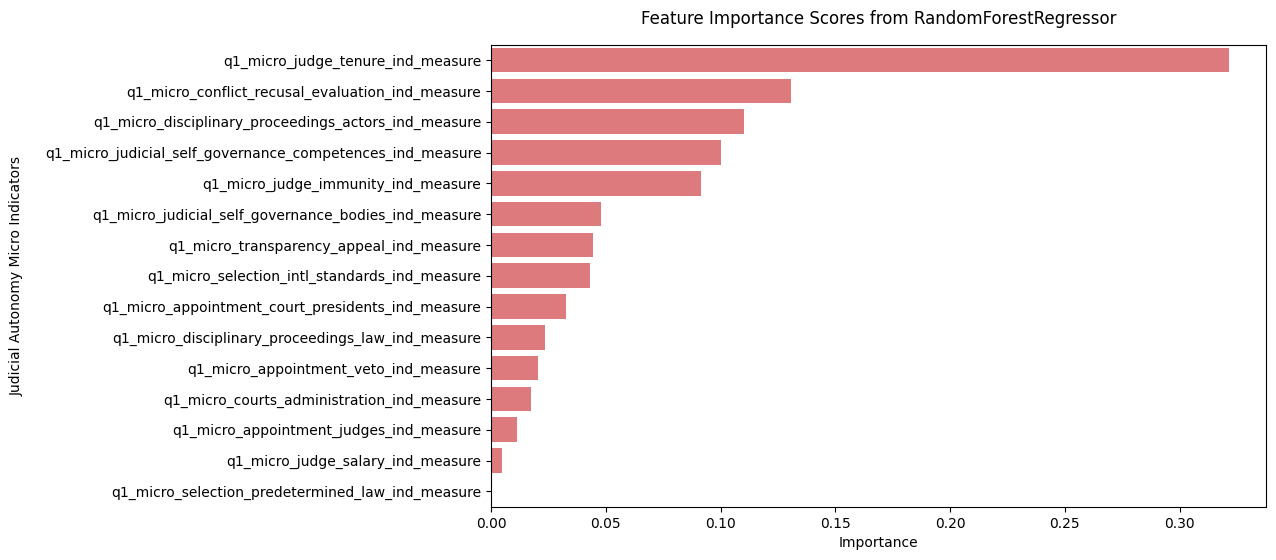

In [38]:
# Plot feature importances

plt.figure(figsize=(10, 6))
sns.barplot(data=features_df_regr, x='Importance', y='Feature', color='#ed696d')

plt.title('Feature Importance Scores from RandomForestRegressor', pad=15)
plt.xlabel('Importance')
plt.ylabel('Judicial Autonomy Micro Indicators', labelpad=15)

plt.savefig("../figures/importance_scores_rf_regressor.jpeg", format="jpeg", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show();

**Summary:**
- Most predictive features (Top 3)
  - Judges' tenure or term in office
  - Conflict of interest, obligation of recusal, evaluation procedures
  - Actors involved in disciplinary proceedings